In [1]:
import pandas as pd

In [2]:
import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt

import nltk
import string
import re

plt.rcParams['figure.figsize']=10,7
plt.rcParams['axes.grid']=False

import warnings
warnings.filterwarnings('ignore')

In [3]:
# df_august=pd.read_csv("A:\Customer Reviews Intent Analysis\Data\Reviews Data (August).csv")
# df_september=pd.read_csv("A:\Customer Reviews Intent Analysis\Data\Reviews Data (September).csv")

In [4]:
# df_august.head()

In [5]:
# df_september.head()

In [6]:
df=pd.read_csv('A:\Customer Reviews Intent Analysis\Data\combined_reviews.csv')

In [7]:
# df=pd.concat([df_august,df_september],axis=0)

In [8]:
df.shape

(7285, 5)

In [9]:
df.head()

,Restaurant Name,Author,Review URL,Comment,Rating
0,24/7 Food Ex,Shikha Sharma,https://www.zoma.to/QqPBkQY,it is taste less hakka noodles. it was so oily,2.0
1,24/7 Food Ex,Sanju Nishad,https://www.zoma.to/OYQvMym,It was paneer cheese pizza but there was not e...,1.0
2,24/7 Food Ex,Aayush Pandey,https://www.zoma.to/dErRgGP,No cutlery was served with the respected order,2.0
3,24/7 Food Ex,Shivanshi Yadav,https://www.zoma.to/bqlLpAO,No salt,2.0
4,24/7 Food Ex,Ap,https://www.zoma.to/wBOamdK,most favourite food every....i gave 100 out o...,5.0


In [10]:
df.head()

,Restaurant Name,Author,Review URL,Comment,Rating
0,24/7 Food Ex,Shikha Sharma,https://www.zoma.to/QqPBkQY,it is taste less hakka noodles. it was so oily,2.0
1,24/7 Food Ex,Sanju Nishad,https://www.zoma.to/OYQvMym,It was paneer cheese pizza but there was not e...,1.0
2,24/7 Food Ex,Aayush Pandey,https://www.zoma.to/dErRgGP,No cutlery was served with the respected order,2.0
3,24/7 Food Ex,Shivanshi Yadav,https://www.zoma.to/bqlLpAO,No salt,2.0
4,24/7 Food Ex,Ap,https://www.zoma.to/wBOamdK,most favourite food every....i gave 100 out o...,5.0


In [11]:
# df['Channel']=df['Channel'].replace('zomato','Zomato')
# df['Channel']=df['Channel'].replace('swiggy','Swiggy')
# df['Channel']=df['Channel'].replace('google','Google')

In [12]:
df.head()

,Restaurant Name,Author,Review URL,Comment,Rating
0,24/7 Food Ex,Shikha Sharma,https://www.zoma.to/QqPBkQY,it is taste less hakka noodles. it was so oily,2.0
1,24/7 Food Ex,Sanju Nishad,https://www.zoma.to/OYQvMym,It was paneer cheese pizza but there was not e...,1.0
2,24/7 Food Ex,Aayush Pandey,https://www.zoma.to/dErRgGP,No cutlery was served with the respected order,2.0
3,24/7 Food Ex,Shivanshi Yadav,https://www.zoma.to/bqlLpAO,No salt,2.0
4,24/7 Food Ex,Ap,https://www.zoma.to/wBOamdK,most favourite food every....i gave 100 out o...,5.0


In [13]:
df.describe()

,Rating
count,7285.000000
mean,2.916884
std,1.747239
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,5.000000


In [14]:
df = df.dropna(subset=['Comment'])


In [15]:
df.head()

,Restaurant Name,Author,Review URL,Comment,Rating
0,24/7 Food Ex,Shikha Sharma,https://www.zoma.to/QqPBkQY,it is taste less hakka noodles. it was so oily,2.0
1,24/7 Food Ex,Sanju Nishad,https://www.zoma.to/OYQvMym,It was paneer cheese pizza but there was not e...,1.0
2,24/7 Food Ex,Aayush Pandey,https://www.zoma.to/dErRgGP,No cutlery was served with the respected order,2.0
3,24/7 Food Ex,Shivanshi Yadav,https://www.zoma.to/bqlLpAO,No salt,2.0
4,24/7 Food Ex,Ap,https://www.zoma.to/wBOamdK,most favourite food every....i gave 100 out o...,5.0


In [16]:
df.shape[0]

7285

In [17]:
# df['Created Time'] = pd.to_datetime(df['Created Time'])

# df['Date'] = df['Created Time'].dt.date
# df['Time'] = df['Created Time'].dt.time

In [18]:
df.head()

,Restaurant Name,Author,Review URL,Comment,Rating
0,24/7 Food Ex,Shikha Sharma,https://www.zoma.to/QqPBkQY,it is taste less hakka noodles. it was so oily,2.0
1,24/7 Food Ex,Sanju Nishad,https://www.zoma.to/OYQvMym,It was paneer cheese pizza but there was not e...,1.0
2,24/7 Food Ex,Aayush Pandey,https://www.zoma.to/dErRgGP,No cutlery was served with the respected order,2.0
3,24/7 Food Ex,Shivanshi Yadav,https://www.zoma.to/bqlLpAO,No salt,2.0
4,24/7 Food Ex,Ap,https://www.zoma.to/wBOamdK,most favourite food every....i gave 100 out o...,5.0


In [19]:
# Lowercase
def text_lowercase(text):
    return text.lower()

df['Comment']=df['Comment'].apply(text_lowercase)

In [20]:
# Remove Punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
def remove_punct(text):
    text_nonpunc="".join([char for char in text if char not in string.punctuation])
    return text_nonpunc

df['Comment']=df['Comment'].apply(remove_punct)

In [22]:
def remove_whitespaces(text):
    return " ".join(text.split()) ## This will remove all extra spaces etc.

df['Comment']=df['Comment'].apply(lambda x:remove_whitespaces(x))

In [23]:
## Stopwords are unnecessary words like was, each etc.
## Tokenization means breaking text into individual words

import re

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

df['Comment_Clean'] = df['Comment'].apply(lambda x: tokenize(x))
df.head()

,Restaurant Name,Author,Review URL,Comment,Rating,Comment_Clean
0,24/7 Food Ex,Shikha Sharma,https://www.zoma.to/QqPBkQY,it is taste less hakka noodles it was so oily,2.0,"[it, is, taste, less, hakka, noodles, it, was,..."
1,24/7 Food Ex,Sanju Nishad,https://www.zoma.to/OYQvMym,it was paneer cheese pizza but there was not e...,1.0,"[it, was, paneer, cheese, pizza, but, there, w..."
2,24/7 Food Ex,Aayush Pandey,https://www.zoma.to/dErRgGP,no cutlery was served with the respected order,2.0,"[no, cutlery, was, served, with, the, respecte..."
3,24/7 Food Ex,Shivanshi Yadav,https://www.zoma.to/bqlLpAO,no salt,2.0,"[no, salt]"
4,24/7 Food Ex,Ap,https://www.zoma.to/wBOamdK,most favourite food everyi gave 100 out of 10,5.0,"[most, favourite, food, everyi, gave, 100, out..."


In [24]:
# NLTK - Natural Language Tool Kit is library to perform analysis on text 
# Corpus means bag of words 
#stopword = nltk.corpus.stopwords.words('english')

from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mukul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
# Remove stopwords
def remove_stopwords(tokenized_list):
    filtered_text=[word for word in tokenized_list if word not in stop]
    return filtered_text

In [26]:
df['Comment_Clean']=df['Comment_Clean'].apply(lambda x:remove_stopwords(x))

In [27]:
#Lemmatization
## Lemmatization is bring altogether all simmilar kind of words and create a single word out
import nltk
wn=nltk.stem.WordNetLemmatizer()

def lemmatizing(text):
    lemma=[wn.lemmatize(word) for word in text]
    return lemma

In [28]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mukul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
df['Comment_Clean']=df['Comment_Clean'].apply(lemmatizing)

In [30]:
#Count of most frequent words
word_count={}

for sentence in df['Comment_Clean']:
    for word in sentence:
        
        if word not in word_count:
            word_count[word]=1
            
        else:
            word_count[word]+=1  

In [31]:
word_count

{'taste': 1306,
 'less': 285,
 'hakka': 22,
 'noodle': 132,
 'oily': 93,
 'paneer': 422,
 'cheese': 172,
 'pizza': 268,
 'even': 334,
 'brthe': 62,
 'small': 126,
 'quantitybrliterally': 1,
 'worthless': 4,
 'buying': 4,
 'waste': 113,
 'money': 218,
 'nariyal': 1,
 'chutney': 67,
 'sambhar': 22,
 'smelling': 41,
 'badly': 11,
 'worst': 306,
 'bri': 39,
 'request': 55,
 'zomato': 174,
 'refund': 54,
 'cutlery': 46,
 'served': 235,
 'respected': 1,
 'order': 523,
 'salt': 103,
 'favourite': 70,
 'food': 2661,
 'everyi': 1,
 'gave': 61,
 '100': 16,
 '10': 40,
 'select': 2,
 '2': 126,
 'butter': 142,
 'naan': 55,
 'send': 92,
 '3': 71,
 'roti': 123,
 'bekhar': 1,
 'khana': 47,
 'bad': 567,
 'khrab': 4,
 'h': 47,
 'cold': 236,
 'stale': 149,
 'love': 190,
 'chole': 33,
 'kulche': 13,
 'bitter': 16,
 'sour': 50,
 'like': 542,
 'day': 140,
 'ago': 9,
 'bhai': 18,
 'colddrink': 2,
 '750': 3,
 'ml': 7,
 'wali': 5,
 'mangwai': 2,
 'thi': 46,
 'ap': 4,
 'ne': 14,
 'bheji': 5,
 '250': 5,
 'alread

In [32]:
df_word=pd.DataFrame(word_count.items(), columns=['word','word_count'])
df_word=df_word.sort_values('word_count', ascending=False).reset_index(drop=True)
df_word.head(15)

,word,word_count
0,food,2661
1,good,1983
2,place,1363
3,taste,1306
4,service,1031
5,restaurant,642
6,chicken,624
7,great,600
8,one,582
9,quality,580


In [33]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Mukul\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [34]:
analyser=SentimentIntensityAnalyzer()

def sentiment_pos(sentence):
    sent=analyser.polarity_scores(sentence)
    return sent['pos']

def sentiment_neg(sentence):
    sent=analyser.polarity_scores(sentence)
    return sent['neg']

def sentiment_neu(sentence):
    sent=analyser.polarity_scores(sentence)
    return sent['neu']

def sentiment_comp(sentence):
    sent=analyser.polarity_scores(sentence)
    return sent['comp']

In [35]:
df_word['positive']=df_word['word'].apply(sentiment_pos)
df_word['negative']=df_word['word'].apply(sentiment_neg)

In [36]:
df_word

,word,word_count,positive,negative
0,food,2661,0.0,0.0
1,good,1983,1.0,0.0
2,place,1363,0.0,0.0
3,taste,1306,0.0,0.0
4,service,1031,0.0,0.0
...,...,...,...,...
12616,garland,1,0.0,0.0
12617,partake,1,0.0,0.0
12618,enthralling,1,0.0,0.0
12619,arabian,1,0.0,0.0


In [37]:
# For Postive Words
df_word_pos=df_word.loc[df_word.positive>0]['word']
df_word_pos

1                good
7               great
14               like
15               best
22               nice
             ...     
12448         commend
12471      benevolent
12475    heartwarming
12578     effectively
12597      determined
Name: word, Length: 555, dtype: object

In [38]:
# For Negative Words
df_word_neg=df_word.loc[df_word.negative>0]['word']
df_word_neg

12                bad
36              worst
72               poor
103          pathetic
128      disappointed
             ...     
12534            hide
12537       avoidance
12558             mad
12608      challenged
12610          rudest
Name: word, Length: 443, dtype: object

In [39]:
## CLASSIFICATION OF REVIEWS 
df['positive']=df['Comment'].apply(sentiment_pos)
df['negative']=df['Comment'].apply(sentiment_neg)
df['neutral']=df['Comment'].apply(sentiment_neu)

In [40]:
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
comment_words=''
stopwords=set(STOPWORDS)

for x in df.Comment:
    
    x=str(x)
    
    tokens=x.split()
    
    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower()
        
    for y in tokens:
        comment_words=comment_words+y+' '

In [42]:
comment_words

'it is taste less hakka noodles it was so oily it was paneer cheese pizza but there was not even a cheese in it and brthe paneer was in very very small quantitybrliterally it had no taste was worthless of buying it waste of money for me and the nariyal chutney and sambhar was smelling very badly and was worst in taste🤮 bri request zomato to refund my money no cutlery was served with the respected order no salt most favourite food everyi gave 100 out of 10 i select 2 butter naan but they send me 3 roti bekhar khana very bad taste khrab h khana cold and stale food love your chole kulche all tastes very bitter and sour like it was served 2 days ago bhai colddrink 750 ml wali mangwai thi ap ne 2 bheji 250 ml wali already 45 wali bottle ka 80 rs lya ap ne aur di bottles 20 wali do masala dosa size was not up to much as it was sent previouslybrwe had a good experience with this restaurant for the first time due to which we again ordered the same thing but are totally unsatisfied now brsambha

In [43]:
wordcloud=WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

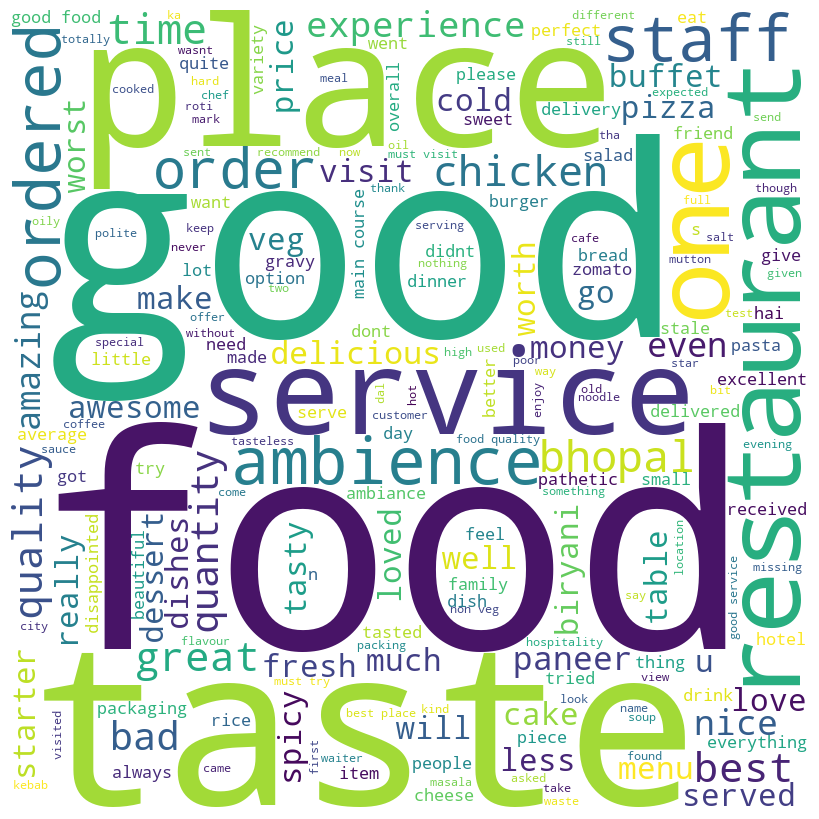

In [44]:
plt.figure(figsize = (8, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

In [45]:
# Save DataFrame as CSV
df.to_csv('cleaned_data2.csv', index=False)
